In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from tqdm import tqdm
from transformers import AutoTokenizer
from model import Model

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_path = '../../data/train.csv'
valid_path = '../../data/dev.csv'
model_name = 'klue/roberta-base'

In [4]:
train_data = pd.read_csv(train_path)
valid_data = pd.read_csv(valid_path)

In [5]:
train_data.sample(10)

,id,source,sentence_1,sentence_2,label,binary-label
7218,boostcamp-sts-v1-train-7218,slack-rtt,(1.5배속으로 보시면 시간 절약 ㅎ),(1.5배속으로 보시면 시간절약 ㅋㅋㅋ),4.8,1.0
2358,boostcamp-sts-v1-train-2358,nsmc-sampled,너무 행복한 영화였어요. :),가슴이 따뜻해지는 영화 :),2.0,0.0
93,boostcamp-sts-v1-train-093,nsmc-sampled,할머니: 감독님... 농구가 하고 싶어요,-점 없어 아쉬움~~,0.0,0.0
8337,boostcamp-sts-v1-train-8337,nsmc-rtt,"어떻게에선 호불호가 갈릴지 모르겠지만, 어디에 서 있더라도 무엇을 바라봐야 하는지를...","호불호가 어떻게 갈릴지는 모르겠지만, 어디에 서든 뭘 봐야할지 정확히 아는 감독인 ...",4.6,1.0
1740,boostcamp-sts-v1-train-1740,slack-sampled,안주는 무엇이었나요???,요 노란색 친구는 뭔가요오오??? 신기신기,0.0,0.0
8535,boostcamp-sts-v1-train-8535,petition-sampled,국회의원 임기단축 검토바랍니다,국회의원 뱃지 개선 요청합니다!,0.2,0.0
4400,boostcamp-sts-v1-train-4400,petition-sampled,개인회생 3년 단축 왜 부산지방법원은 지역별로 차별 하는지요,지방법원의 만행과 개인회생 36개월 단축소급 전국으로 시행하라,2.0,0.0
6830,boostcamp-sts-v1-train-6830,slack-rtt,두 번째 사진 보시면 지뢰찾기의 넓은 세계를 맛보실 수 있습니다.,두 번째 사진을 보시면 지뢰찾기의 광활한 세계를 맛보실 수 있습니다.,4.2,1.0
4754,boostcamp-sts-v1-train-4754,slack-sampled,챕터 타이틀은 이렇습니다.,큰 모니터는 정말 중요한것 같습니다.,0.0,0.0
2950,boostcamp-sts-v1-train-2950,petition-rtt,TV조선 2030에게 길을 묻다를 보면서 대한민국의 희망을 보았습니다.,TV조선 2030 길을 묻다를 보면서 한국의 희망을 보았습니다.,4.8,1.0


In [6]:
valid_data.sample(10)

,id,source,sentence_1,sentence_2,label,binary-label
284,boostcamp-sts-v1-dev-284,nsmc-sampled,페북에 김보라 일진역할 욕하는 동영상 보고 보게됐는데 감동도 있고 재미도 있네요.,가족들이 보기에도 감동도 있었고 신났다아~,1.8,0.0
229,boostcamp-sts-v1-dev-229,slack-sampled,<PERSON> 님과 처음으로 이야기를 나누었습니다!,<PERSON> 님과 이야기 나누었습니다!,3.0,1.0
306,boostcamp-sts-v1-dev-306,nsmc-sampled,테리 길리엄 영화를 다시 찾아보려고 합니다.,테리길리엄.. 그 이름만으로도..,1.8,0.0
108,boostcamp-sts-v1-dev-108,nsmc-sampled,꽤 지루하지 않고 재밌게 본 영화.,꽤 긴 영화 시간임에도 불구하고 전혀 지루하지 않은 스토리 전개가 놀랍다고 느꼈습니다.,3.0,1.0
480,boostcamp-sts-v1-dev-480,petition-rtt,중국발 미세먼지 대책 마련해주세요,중국발 미세먼지 대책 강구해주세요,4.2,1.0
377,boostcamp-sts-v1-dev-377,nsmc-sampled,"머리 나빠서 장면전환,",머리 아파지는 영화다 .,0.8,0.0
402,boostcamp-sts-v1-dev-402,slack-sampled,어제는 <PERSON> 님과 점심을 같이 먹었습니다~,오늘은 <PERSON> 님과 회식 시간을 가졌습니다 ~~!,1.2,0.0
347,boostcamp-sts-v1-dev-347,petition-sampled,북한에 대한 환상 깨라,북한에 끌려다니지 마십시오.,1.2,0.0
294,boostcamp-sts-v1-dev-294,nsmc-sampled,"명장면이 너무 많다,",명장면이 너무많다.,5.0,1.0
199,boostcamp-sts-v1-dev-199,nsmc-sampled,한고은 씨의 매력을 볼수있었던 드라마..,한석규의 전성시대가 열린 영화....,0.0,0.0


In [7]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenizing_text(text):
    return tokenizer(text)['input_ids']
    

In [8]:
def preprocessing_df(df):
    df['sentence_1_tokens'] = df['sentence_1'].apply(tokenizing_text)
    df['sentence_2_tokens'] = df['sentence_2'].apply(tokenizing_text)
    return df
    


In [9]:
train_data = preprocessing_df(train_data)

In [10]:
train_data.sample(10)

,id,source,sentence_1,sentence_2,label,binary-label,sentence_1_tokens,sentence_2_tokens
6642,boostcamp-sts-v1-train-6642,petition-sampled,양심적 병역거부 - 명칭 개칭 바랍니다.,양심적 병역 거부자 ->비양심적 병역 거부자,2.6,1.0,"[0, 8542, 2125, 10239, 2180, 2144, 17, 7864, 5...","[0, 8542, 2125, 10239, 4966, 2155, 17, 34, 118..."
2285,boostcamp-sts-v1-train-2285,petition-sampled,가상화폐 거래 저도 하고 싶습니다.,가상화폐 거래소 폐지 및 규제 강화를 요청합니다.,1.0,0.0,"[0, 7024, 2267, 2616, 4083, 1535, 2119, 6159, ...","[0, 7024, 2267, 2616, 8070, 5631, 1116, 4606, ..."
3151,boostcamp-sts-v1-train-3151,slack-sampled,공통점 있습니다!!,성별 무관합니다!!,0.0,0.0,"[0, 10414, 1513, 2219, 3606, 5, 5, 2]","[0, 12444, 7558, 11800, 5, 5, 2]"
9120,boostcamp-sts-v1-train-9120,slack-sampled,내일 보내도 괜찮은 스케줄이라면 타운홀 미팅에서 사진 찰칵 해도 좋을 것 같아요!,타운홀 미팅때만 뵙다가 처음으로 이야기를 나눈 자리였어요.,1.2,0.0,"[0, 5420, 4209, 2119, 5110, 2073, 12868, 2052,...","[0, 8211, 2827, 11909, 2775, 2154, 1172, 4795,..."
4716,boostcamp-sts-v1-train-4716,nsmc-sampled,마지막에 결국은..,아씨 마지막에 눙물 ㅜㅜ .......,1.8,0.0,"[0, 4178, 2170, 3983, 2073, 18, 18, 2]","[0, 27489, 4178, 2170, 3, 9922, 18, 18, 18, 18..."
5935,boostcamp-sts-v1-train-5935,slack-rtt,추가 정보 수정 필요한 부분에서 필요한 거 있으시면 알려주세요!,추가 정보를 위해 수정해야 할 사항이 있으면 알려주세요!,3.4,1.0,"[0, 4140, 3766, 5413, 3677, 2470, 3884, 27135,...","[0, 4140, 3766, 2138, 3627, 5413, 8084, 1892, ..."
7042,boostcamp-sts-v1-train-7042,nsmc-rtt,"이런게 진짜 영화다,",이건 진짜 영화다,3.4,1.0,"[0, 3667, 2318, 4229, 3771, 2062, 16, 2]","[0, 5370, 4229, 3771, 2062, 2]"
5477,boostcamp-sts-v1-train-5477,petition-sampled,사립유치원을 지켜주세요,지정주차구역을 지켜주세요.,0.4,0.0,"[0, 8362, 2298, 2225, 2252, 2069, 4580, 2223, ...","[0, 4753, 2223, 2232, 8467, 2069, 4580, 2223, ..."
743,boostcamp-sts-v1-train-743,nsmc-sampled,이건뭐 재미는 있으나 너무 쓰레기 영화,그냥 쓰레기영화 너무 재미없어,2.2,0.0,"[0, 5370, 3005, 4697, 2259, 1513, 4381, 3760, ...","[0, 4181, 6614, 16516, 3760, 19113, 2051, 2]"
825,boostcamp-sts-v1-train-825,nsmc-sampled,킬링타임용 이하입니다.,킬링타임용으로도 아깝습니다.,3.6,1.0,"[0, 1757, 2557, 15302, 2048, 4547, 12190, 18, 2]","[0, 1757, 2557, 15302, 2048, 6233, 2119, 15021..."


In [11]:
train_data.isna().sum()

id                   0
source               0
sentence_1           0
sentence_2           0
label                0
binary-label         0
sentence_1_tokens    0
sentence_2_tokens    0
dtype: int64

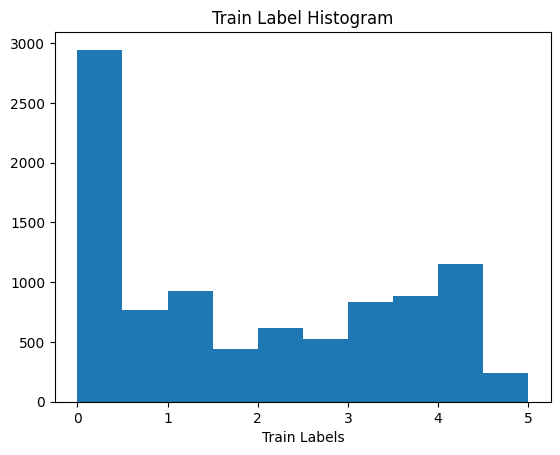

In [12]:
plt.hist(train_data['label'], bins=10)
plt.title('Train Label Histogram')
plt.xlabel('Train Labels')
plt.show()

In [13]:
print(f"전체 개수: {len(train_data)}")
print(f"label이 0.0 개수: {(train_data['label']==0.0).sum()}")

전체 개수: 9324
label이 0.0 개수: 2119


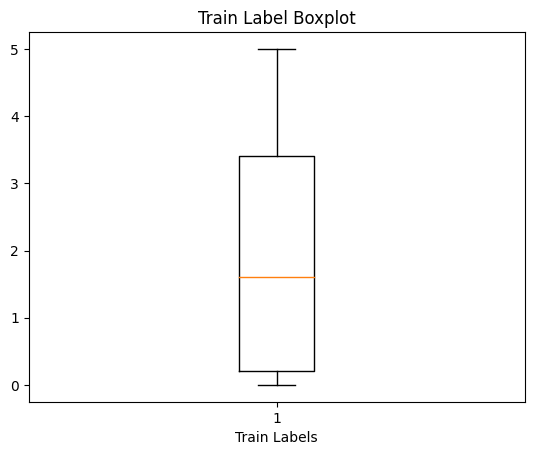

In [14]:
plt.boxplot(train_data['label'])
plt.title('Train Label Boxplot')
plt.xlabel('Train Labels')
plt.show()

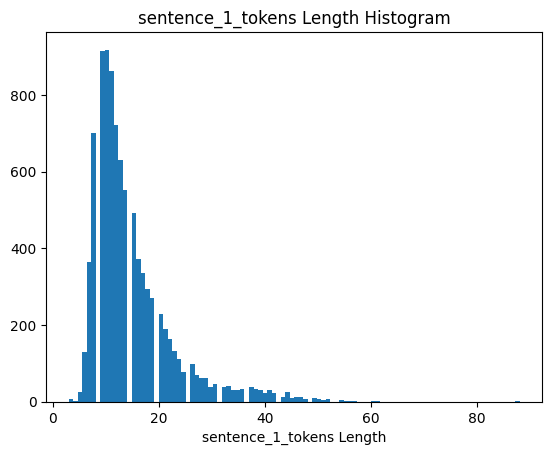

In [15]:
plt.hist(train_data['sentence_1_tokens'].apply(len), bins=100)
plt.title('sentence_1_tokens Length Histogram')
plt.xlabel('sentence_1_tokens Length')
plt.show()

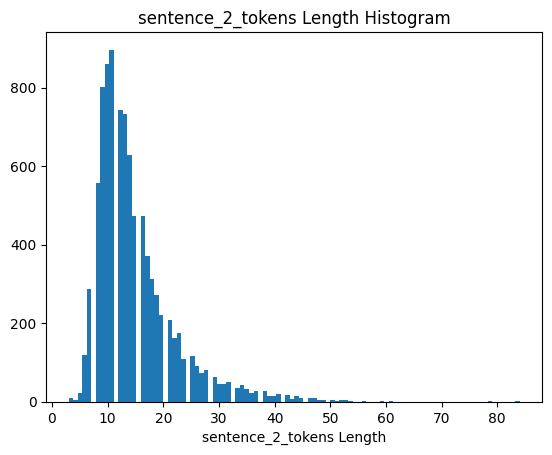

In [16]:
plt.hist(train_data['sentence_2_tokens'].apply(len), bins=100)
plt.title('sentence_2_tokens Length Histogram')
plt.xlabel('sentence_2_tokens Length')
plt.show()

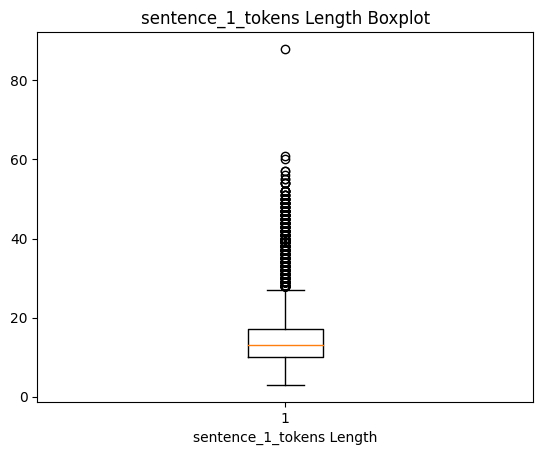

In [17]:
plt.boxplot(train_data['sentence_1_tokens'].apply(len))
plt.title('sentence_1_tokens Length Boxplot')
plt.xlabel('sentence_1_tokens Length')
plt.show()

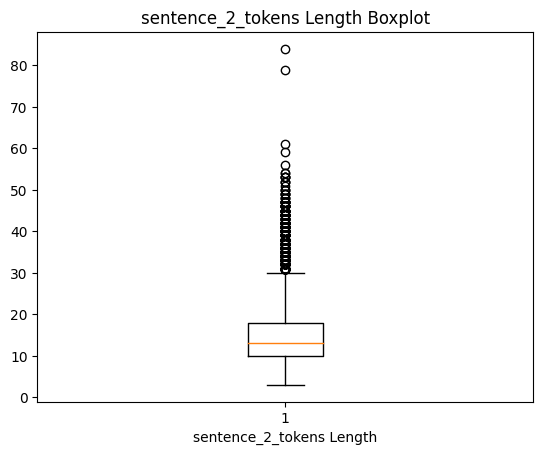

In [18]:
plt.boxplot(train_data['sentence_2_tokens'].apply(len))
plt.title('sentence_2_tokens Length Boxplot')
plt.xlabel('sentence_2_tokens Length')
plt.show()

In [19]:
import re
import emoji
from soynlp.normalizer import repeat_normalize

pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣]+')
url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

def clean(x): 
    x = pattern.sub(' ', x)
    x = emoji.replace_emoji(x, replace='') #emoji 삭제
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)

    return x

In [20]:
train_data['sentence_1'] = train_data['sentence_1'].apply(clean)
train_data['sentence_2'] = train_data['sentence_2'].apply(clean)
train_data = preprocessing_df(train_data)

In [21]:
train_data.sample(10)
#이거 초등학생때 가족이랑 같이 극장가서 봤다. OOO기 영화
tokenizer('<PERSON>')

{'input_ids': [0, 32, 21639, 2238, 18946, 34, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [22]:
from kortt import Generator
import math

In [23]:
train_data['int_label'] = train_data['label'].apply(math.floor)

In [30]:
print(train_data.groupby('int_label')['id'].count())

int_label
0    3711
1    1368
2    1137
3    1715
4    1302
5      91
Name: id, dtype: int64


In [32]:
target_df = train_data.groupby('int_label').get_group(0)

In [34]:
samples = target_df.sample(10)

In [39]:
samples

,id,source,sentence_1,sentence_2,label,binary-label,sentence_1_tokens,sentence_2_tokens,int_label
227,boostcamp-sts-v1-train-227,nsmc-sampled,수지 목소리 너무좋아ㅜㅜㅜ,소소한재미ㅜㅋ여탯껏삶을다시돌아보게하는영화ㅜ,0.0,0.0,"[0, 7011, 4243, 3760, 2716, 2227, 11863, 2409, 2]","[0, 3, 2]",0
6283,boostcamp-sts-v1-train-6283,slack-sampled,"학교 얘기부터 부트캠프, 각 팀이 일하는 방식 등 많은 얘기를 나눌 수 있어서 즐거...","분식파티하면서 poc얘기, 입사전 입사하라고 설득했던 추억 등 많은 얘기나눴습니다.",0.8,0.0,"[0, 3741, 3880, 3797, 1173, 2265, 28697, 16, 5...","[0, 14436, 27254, 5643, 2112, 83, 6624, 3367, ...",0
2735,boostcamp-sts-v1-train-2735,slack-sampled,<PERSON> 님과의 유쾌한 밥스테이지를 진행했습니다.,<PERSON> 님의 눕방 아주 재밌게 시청했습니다 .,0.4,0.0,"[0, 32, 21639, 2238, 18946, 34, 805, 2145, 207...","[0, 32, 21639, 2238, 18946, 34, 805, 2079, 783...",0
7091,boostcamp-sts-v1-train-7091,nsmc-sampled,뭐 어쩌라고....,"뭐 별로,, 그냥 그래..",0.6,0.0,"[0, 1097, 5397, 7245, 18, 18, 18, 18, 2]","[0, 1097, 5429, 16, 16, 4181, 3672, 18, 18, 2]",0
4531,boostcamp-sts-v1-train-4531,slack-sampled,제가 호스트하니 시간되시면 오셔도 좋습니다.,근처 오시면 무조건 차 대접 드립니다.,0.0,0.0,"[0, 1545, 2116, 24769, 13679, 3641, 2496, 2067...","[0, 6328, 1443, 2067, 2460, 6512, 1632, 9087, ...",0
6419,boostcamp-sts-v1-train-6419,petition-sampled,밤토끼뿐아니라 모든 불법사이트 처벌바랍니다.,가상화폐 거래소뿐 아니라 완전한 폐지를 원합니다.,0.0,0.0,"[0, 1126, 2386, 2274, 2782, 2227, 2209, 2181, ...","[0, 7024, 2267, 2616, 8070, 2782, 3614, 2181, ...",0
3125,boostcamp-sts-v1-train-3125,nsmc-sampled,직원분들 알바하시지 마시길...,여러분들도 꼭 사세요 이책...,0.0,0.0,"[0, 4070, 2377, 2031, 14321, 2205, 2067, 2118,...","[0, 4988, 2031, 2119, 677, 1233, 5971, 1504, 2...",0
5486,boostcamp-sts-v1-train-5486,petition-sampled,경찰댓글부대 조사를 철처히 해주시기를 바랍니다.,수사기관이 조사하게 해주십시오.,0.2,0.0,"[0, 3858, 3315, 2701, 24972, 3742, 2138, 1653,...","[0, 4103, 2015, 2133, 2052, 3742, 2205, 2318, ...",0
3234,boostcamp-sts-v1-train-3234,nsmc-sampled,이건 왜 만든건지. 미스테리.,미스테리 물이 왜이렇게 지루했을까..,0.6,0.0,"[0, 5370, 1460, 4260, 2332, 2118, 18, 10102, 2...","[0, 10102, 2201, 2059, 1093, 2052, 1460, 2052,...",0
7271,boostcamp-sts-v1-train-7271,petition-sampled,장애방과후 돌보미교실,초등돌봄교실 지자체 이관건,0.4,0.0,"[0, 4360, 2239, 2145, 2158, 9878, 2044, 2120, ...","[0, 4885, 2324, 3064, 2120, 2477, 5518, 15336,...",0


In [50]:
generator = Generator(mode='google')
generator.generate('나는 밥을 먹는다')

'나는 쌀을 먹는다'

In [51]:
for i, row in samples.iterrows():
    row['sentence_1'] = generator.generate(row['sentence_1'])
    samples.loc[i] = row

In [52]:
samples

,id,source,sentence_1,sentence_2,label,binary-label,sentence_1_tokens,sentence_2_tokens,int_label,227,6283,2735,7091,4531,6419,3125,5486,3234,7271
227,boostcamp-sts-v1-train-227,nsmc-sampled,Suzy의 목소리는 너무 좋습니다,소소한재미ㅜㅋ여탯껏삶을다시돌아보게하는영화ㅜ,0.0,0.0,"[0, 7011, 4243, 3760, 2716, 2227, 11863, 2409, 2]","[0, 3, 2]",0,Suzy의 목소리는 너무 좋습니다,Suzy의 목소리는 너무 좋습니다,Suzy의 목소리는 너무 좋습니다,Suzy의 목소리는 너무 좋습니다,Suzy의 목소리는 너무 좋습니다,Suzy의 목소리는 너무 좋습니다,Suzy의 목소리는 너무 좋습니다,Suzy의 목소리는 너무 좋습니다,Suzy의 목소리는 너무 좋습니다,Suzy의 목소리는 너무 좋습니다
6283,boostcamp-sts-v1-train-6283,slack-sampled,"학교 대화, 부트 캠프 및 각 팀의 일 방식에서 많은 이야기를 할 수있는 것은 재미...","분식파티하면서 poc얘기, 입사전 입사하라고 설득했던 추억 등 많은 얘기나눴습니다.",0.8,0.0,"[0, 3741, 3880, 3797, 1173, 2265, 28697, 16, 5...","[0, 14436, 27254, 5643, 2112, 83, 6624, 3367, ...",0,"학교 대화, 부트 캠프 및 각 팀의 일 방식에서 많은 이야기를 할 수있는 것은 재미...","학교 대화, 부트 캠프 및 각 팀의 일 방식에서 많은 이야기를 할 수있는 것은 재미...","학교 대화, 부트 캠프 및 각 팀의 일 방식에서 많은 이야기를 할 수있는 것은 재미...","학교 대화, 부트 캠프 및 각 팀의 일 방식에서 많은 이야기를 할 수있는 것은 재미...","학교 대화, 부트 캠프 및 각 팀의 일 방식에서 많은 이야기를 할 수있는 것은 재미...","학교 대화, 부트 캠프 및 각 팀의 일 방식에서 많은 이야기를 할 수있는 것은 재미...","학교 대화, 부트 캠프 및 각 팀의 일 방식에서 많은 이야기를 할 수있는 것은 재미...","학교 대화, 부트 캠프 및 각 팀의 일 방식에서 많은 이야기를 할 수있는 것은 재미...","학교 대화, 부트 캠프 및 각 팀의 일 방식에서 많은 이야기를 할 수있는 것은 재미...","학교 대화, 부트 캠프 및 각 팀의 일 방식에서 많은 이야기를 할 수있는 것은 재미..."
2735,boostcamp-sts-v1-train-2735,slack-sampled,우리는 <person>이있는 쾌적한 쌀 무대를 가지고 있습니다.,<PERSON> 님의 눕방 아주 재밌게 시청했습니다 .,0.4,0.0,"[0, 32, 21639, 2238, 18946, 34, 805, 2145, 207...","[0, 32, 21639, 2238, 18946, 34, 805, 2079, 783...",0,우리는 <person>이있는 쾌적한 쌀 무대를 가지고 있습니다.,우리는 <person>이있는 쾌적한 쌀 무대를 가지고 있습니다.,우리는 <person>이있는 쾌적한 쌀 무대를 가지고 있습니다.,우리는 <person>이있는 쾌적한 쌀 무대를 가지고 있습니다.,우리는 <person>이있는 쾌적한 쌀 무대를 가지고 있습니다.,우리는 <person>이있는 쾌적한 쌀 무대를 가지고 있습니다.,우리는 <person>이있는 쾌적한 쌀 무대를 가지고 있습니다.,우리는 <person>이있는 쾌적한 쌀 무대를 가지고 있습니다.,우리는 <person>이있는 쾌적한 쌀 무대를 가지고 있습니다.,우리는 <person>이있는 쾌적한 쌀 무대를 가지고 있습니다.
7091,boostcamp-sts-v1-train-7091,nsmc-sampled,그래서 뭐 ....,"뭐 별로,, 그냥 그래..",0.6,0.0,"[0, 1097, 5397, 7245, 18, 18, 18, 18, 2]","[0, 1097, 5429, 16, 16, 4181, 3672, 18, 18, 2]",0,그래서 뭐 ....,그래서 뭐 ....,그래서 뭐 ....,그래서 뭐 ....,그래서 뭐 ....,그래서 뭐 ....,그래서 뭐 ....,그래서 뭐 ....,그래서 뭐 ....,그래서 뭐 ....
4531,boostcamp-sts-v1-train-4531,slack-sampled,나는 주최 되었기 때문에 올 수 있습니다.,근처 오시면 무조건 차 대접 드립니다.,0.0,0.0,"[0, 1545, 2116, 24769, 13679, 3641, 2496, 2067...","[0, 6328, 1443, 2067, 2460, 6512, 1632, 9087, ...",0,나는 주최 되었기 때문에 올 수 있습니다.,나는 주최 되었기 때문에 올 수 있습니다.,나는 주최 되었기 때문에 올 수 있습니다.,나는 주최 되었기 때문에 올 수 있습니다.,나는 주최 되었기 때문에 올 수 있습니다.,나는 주최 되었기 때문에 올 수 있습니다.,나는 주최 되었기 때문에 올 수 있습니다.,나는 주최 되었기 때문에 올 수 있습니다.,나는 주최 되었기 때문에 올 수 있습니다.,나는 주최 되었기 때문에 올 수 있습니다.
6419,boostcamp-sts-v1-train-6419,petition-sampled,밤나무 토끼뿐만 아니라 모든 불법 유적지를 처벌하십시오.,가상화폐 거래소뿐 아니라 완전한 폐지를 원합니다.,0.0,0.0,"[0, 1126, 2386, 2274, 2782, 2227, 2209, 2181, ...","[0, 7024, 2267, 2616, 8070, 2782, 3614, 2181, ...",0,밤나무 토끼뿐만 아니라 모든 불법 유적지를 처벌하십시오.,밤나무 토끼뿐만 아니라 모든 불법 유적지를 처벌하십시오.,밤나무 토끼뿐만 아니라 모든 불법 유적지를 처벌하십시오.,밤나무 토끼뿐만 아니라 모든 불법 유적지를 처벌하십시오.,밤나무 토끼뿐만 아니라 모든 불법 유적지를 처벌하십시오.,밤나무 토끼뿐만 아니라 모든 불법 유적지를 처벌하십시오.,밤나무 토끼뿐만 아니라 모든 불법 유적지를 처벌하십시오.,밤나무 토끼뿐만 아니라 모든 불법 유적지를 처벌하십시오.,밤나무 토끼뿐만 아니라 모든 불법 유적지를 처벌하십시오.,밤나무 토끼뿐만 아니라 모든 불법 유적지를 처벌하십시오.
3125,boostcamp-sts-v1-train-3125,nsmc-sampled,직원을 위해 알바하시를하지 마십시오 ...,여러분들도 꼭 사세요 이책...,0.0,0.0,"[0, 4070, 2377, 2031, 14321, 2205, 2067, 2118,...","[0, 4988, 2031, 2119, 677, 1233, 5971, 1504, 2...",0,직원을 위해 알바하시를하지 마십시오 ...,직원을 위해 알바하시를하지 마십시오 ...,직원을 위해 알바하시를하지 마십시오 ...,직원을 위해 알바하시를하지 마십시오 ...,직원을 위해 알바하시를하지 마십시오 ...,직원을 위해 알바하시를하지 마십시오 ...,직원을 위해 알바하시를하지 마십시오 ...,직원을 위해 알바하시를하지 마십시오 ...,직원을 위해 알바하시를하지 마십시오 ...,직원을 위해 알바하시를하지 마십시오 ...
5486,boostcamp-sts-v1-train-5486,petition-sampled,경찰 의견 부서를 조사하시기 바랍니다.,수사기관이 조사하게 해주십시오.,0.2,0.0,"[0, 3858, 3315, 2701, 24972, 3742, 2138, 1653,...","[0, 4103, 2015, 2133, 2052, 3742, 2205, 2318, ...",0,경찰 의견 부서를 조사하시기 바랍니다.,경찰 의견 부서를 조사하시기 바랍니다.,경찰 의견 부서를 조사하시기 바랍니다.,경찰 의견 부서를 조사하시기 바랍니다.,경찰 의견 부서를 조사하시기 바랍니다.,경찰 의견 부서를 조사하시기 바랍니다.,경찰 의견 부서를 조사하시기 바랍니다.,경찰 의견 부서를 조사하시기 바랍니다.,경찰 의견 부서를 조사하시기 바랍니다.,경찰 의견 부서를 조